In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

Lab 5(i)

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    sns.set(font_scale=1)
    plt.figure(figsize=(10,5))
    labels = [0,1,2]
    # representing A in heatmap format
    cmap1=sns.light_palette("orange")
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".0f", xticklabels=labels,yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
def model_evaluations(X_train,y_train,X_test,y_test):
    gb = GaussianNB()
    knn = KNeighborsClassifier(round(math.sqrt(X_train.shape[0])))
    dt = DecisionTreeClassifier()
    gb.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    y_pred = gb.predict(X_test)
    print(f"\nmodel: Naive bayes \naccuracy:{accuracy_score(y_test,y_pred)}")
    plot_confusion_matrix(y_test,y_pred)
    y_pred = knn.predict(X_test)
    print(f"\n\nmodel: k nearest neighbors\naccuracy:{accuracy_score(y_test,y_pred)}")
    plot_confusion_matrix(y_test,y_pred)
    y_pred = dt.predict(X_test)
    print(f"\n\nmodel:decision tree \naccuracy:{accuracy_score(y_test,y_pred)}")
    plot_confusion_matrix(y_test,y_pred)

accuracy score for models with train set = 0.80 and test set = 0.20

model: Naive bayes 
accuracy:1.0


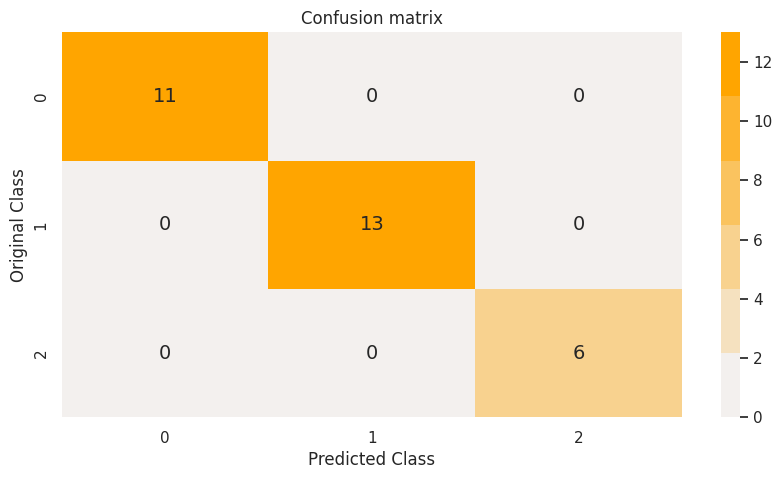



model: k nearest neighbors
accuracy:1.0


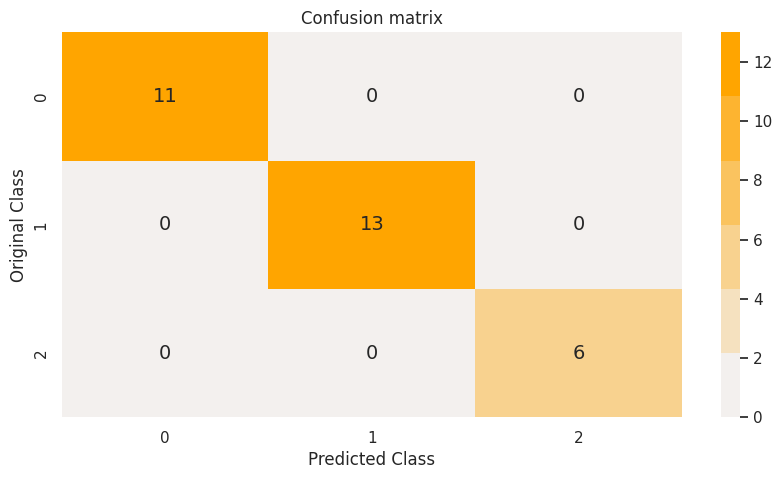



model:decision tree 
accuracy:0.9666666666666667


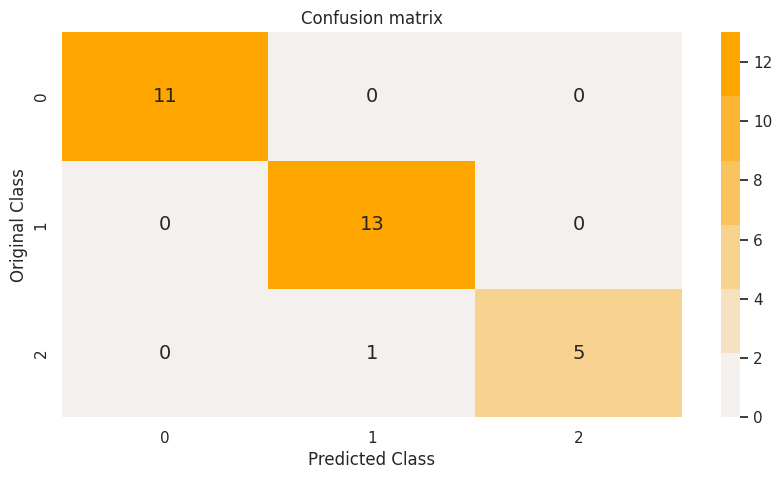

In [ ]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print("accuracy score for models with train set = 0.80 and test set = 0.20")
model_evaluations(X_train, y_train, X_test, y_test)

accuracy score for models with train set = 0.666 and test set = 0.333 

model: Naive bayes 
accuracy:1.0


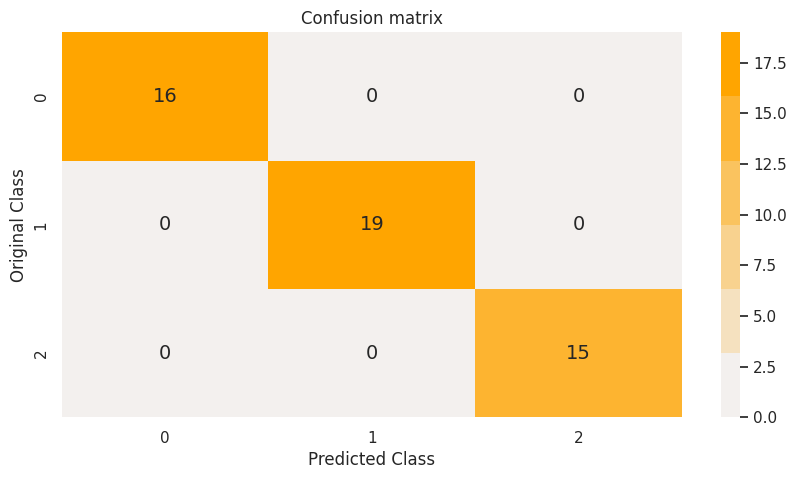



model: k nearest neighbors
accuracy:1.0


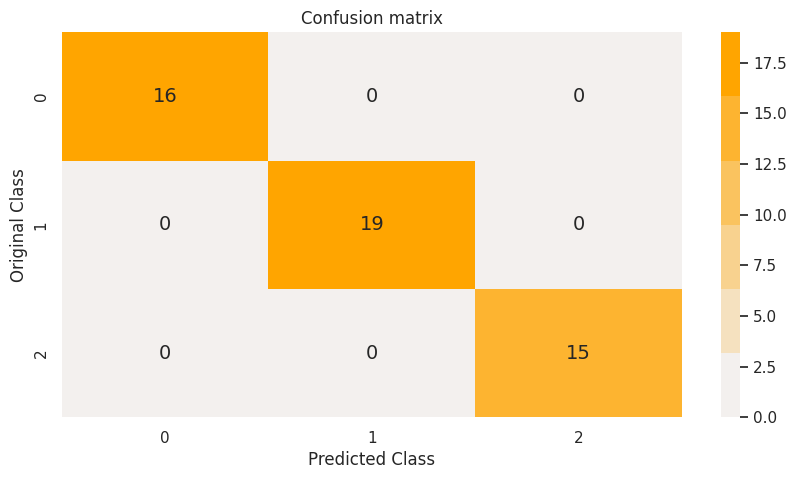



model:decision tree 
accuracy:0.98


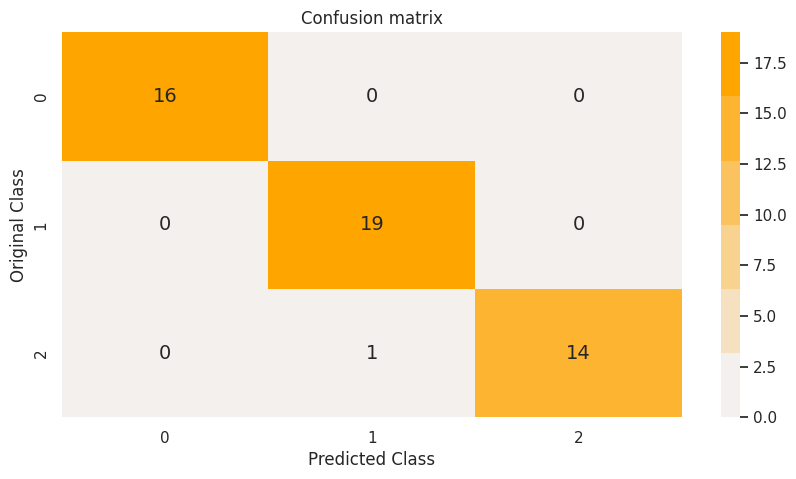

In [ ]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.333,random_state=0)
print("accuracy score for models with train set = 0.666 and test set = 0.333 ")
model_evaluations(X_train, y_train, X_test, y_test)

accuracy score for models with train set = 0.80 and test set = 0.20 

model: Naive bayes 
accuracy:1.0


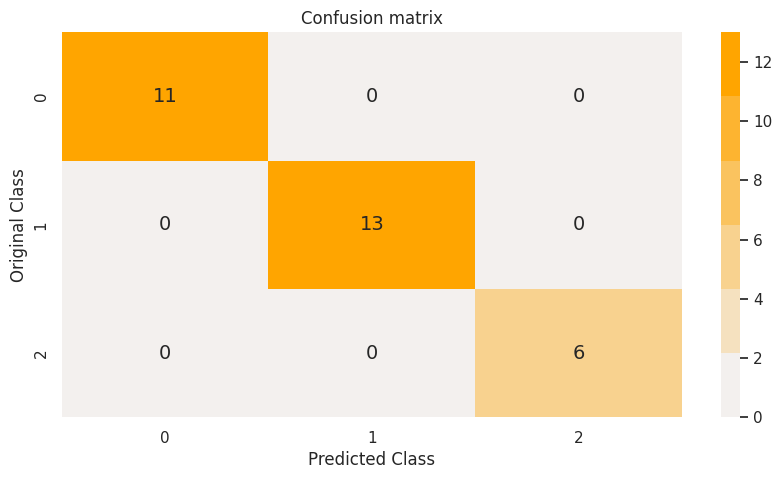



model: k nearest neighbors
accuracy:1.0


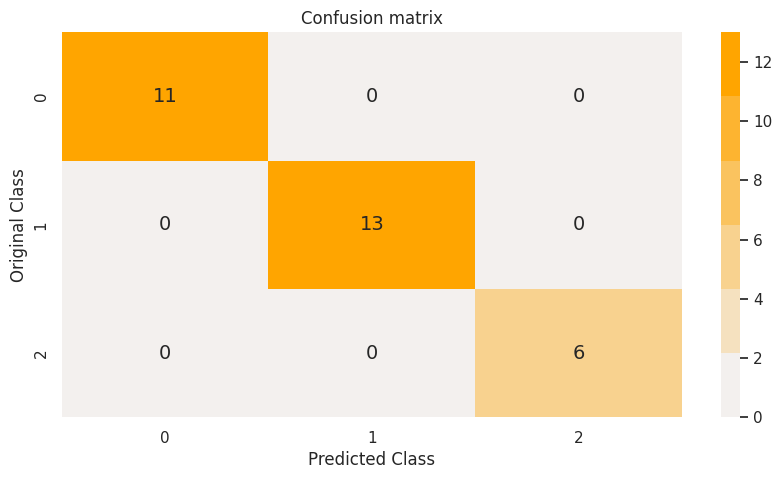



model:decision tree 
accuracy:0.9666666666666667


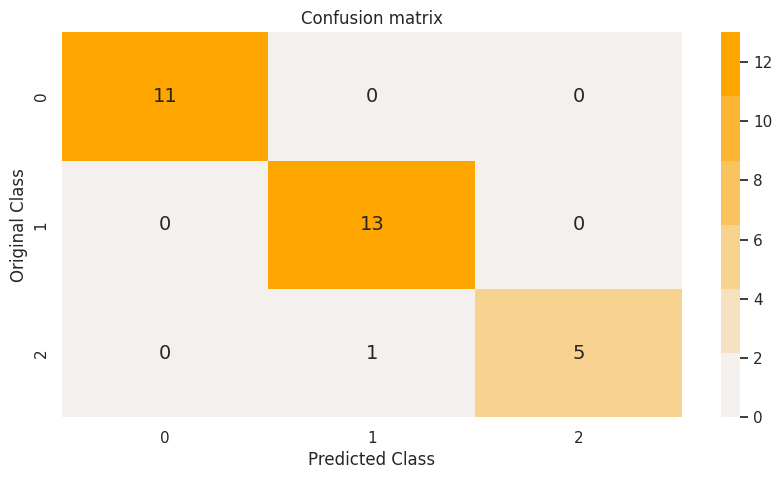

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print("accuracy score for models with train set = 0.80 and test set = 0.20 ")
model_evaluations(X_train, y_train, X_test, y_test)

In [ ]:
import random
def plot_c(C):
    sns.set(font_scale=1)
    plt.figure(figsize=(10,5))
    labels = [0,1,2]
    cmap1=sns.light_palette("orange")
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".0f", xticklabels=labels,yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
acc1, acc2, acc3 = list(),list(),list()
cf1, cf2, cf3 = [[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]]

In [ ]:
for _ in range(10):
    rd = random.randint(0,1000)
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=rd)
    gb = GaussianNB()
    knn = KNeighborsClassifier(round(math.sqrt(X_train.shape[0])))
    dt = DecisionTreeClassifier()
    gb.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    y_pred = gb.predict(X_test)
    acc1.append(accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    cf1 =  [[cf1[k][j] + cm[k][j]  for j in range(3)] for k in range(3)]
    y_pred = knn.predict(X_test)
    acc2.append(accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    cf2 =  [[cf2[k][j] + cm[k][j]  for j in range(3)] for k in range(3)]
    y_pred = dt.predict(X_test)
    acc3.append(accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    cf3 =  [[cf3[k][j] + cm[k][j]  for j in range(3)] for k in range(3)]

accuracy score for models with train set = 0.80 and test set = 0.20 

model: Naive bayes 
accuracy:0.9966666666666667


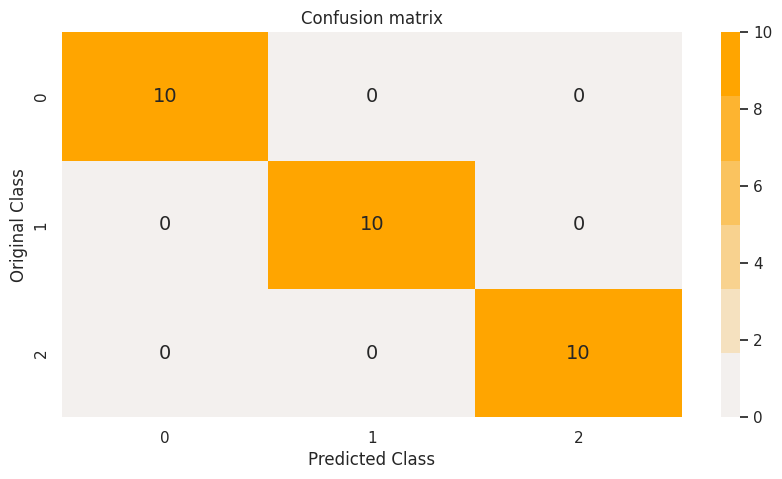



model: k nearest neighbors 
accuracy:0.9866666666666667


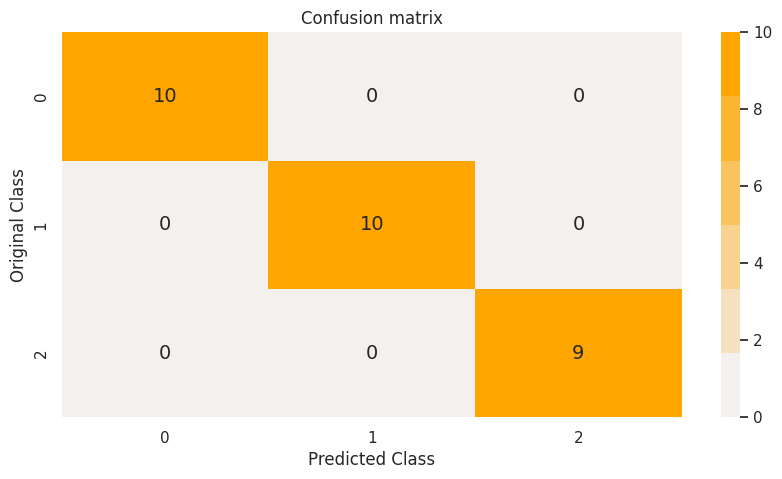



model:decision tree 
accuracy:0.9933333333333334


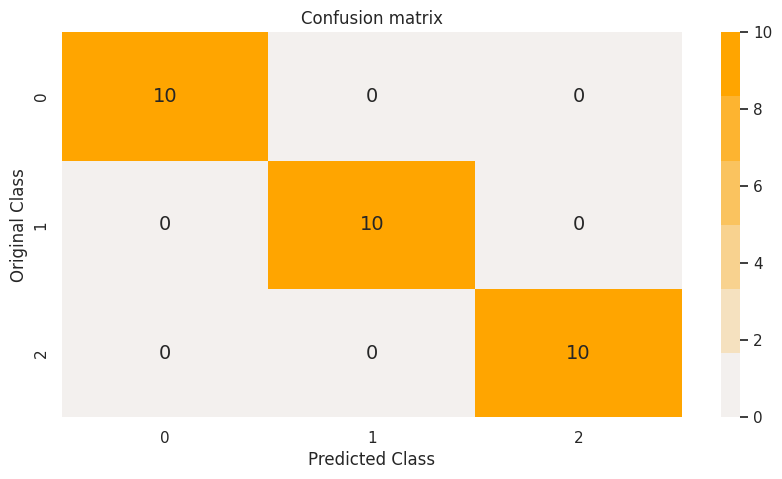

In [ ]:
print("accuracy score for models with train set = 0.80 and test set = 0.20 ")
print(f"\nmodel: Naive bayes \naccuracy:{sum(acc1)/10}")
cf1 = [[round(cf1[k][j]/10)  for j in range(3)] for k in range(3)]
plot_c(cf1)
print(f"\n\nmodel: k nearest neighbors \naccuracy:{sum(acc2)/10}")
cf2 = [[round(cf2[k][j]/10)  for j in range(3)] for k in range(3)]
plot_c(cf2)
print(f"\n\nmodel:decision tree \naccuracy:{sum(acc3)/10}")
cf3 = [[round(cf3[k][j]/10)  for j in range(3)] for k in range(3)]
plot_c(cf3)

In [ ]:
from sklearn.model_selection import cross_val_score
DT = cross_val_score(DecisionTreeClassifier(), X,y )
print("DecisionTree :",DT.mean())
KNN = cross_val_score(KNeighborsClassifier(), X,y )
print("KNeighborsClassifier :",KNN.mean())
NB = cross_val_score(GaussianNB(), X,y)
print("GaussianNB : ",NB.mean())

DecisionTree : 0.9
KNeighborsClassifier : 0.8733333333333333
GaussianNB :  0.9933333333333334


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
ss = StandardScaler()
X = ss.fit_transform(X)

accuracy score for models with train set = 0.80 and test set = 0.20 and all the data is standardized

model: Naive bayes 
accuracy:1.0


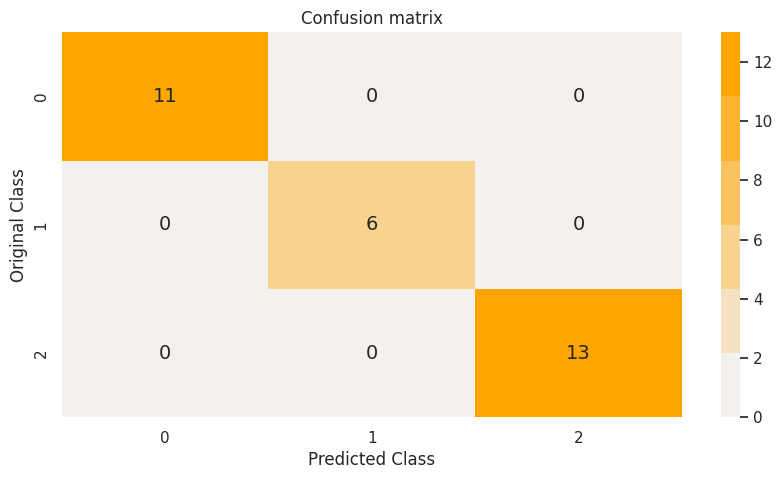



model: k nearest neighbors
accuracy:1.0


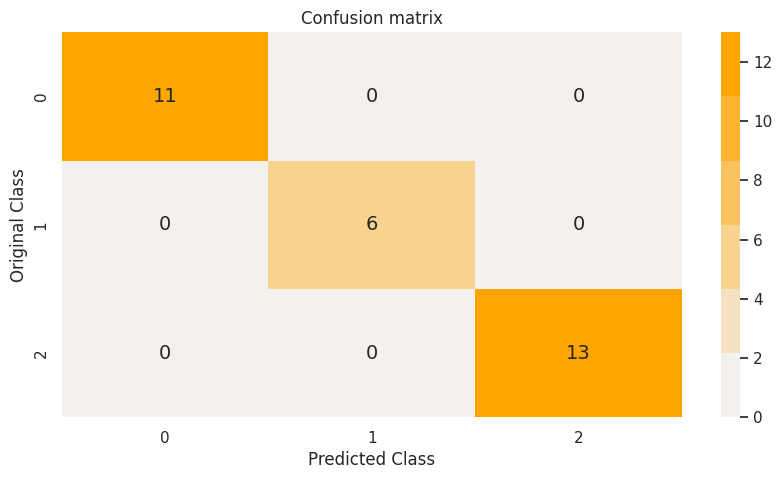



model:decision tree 
accuracy:1.0


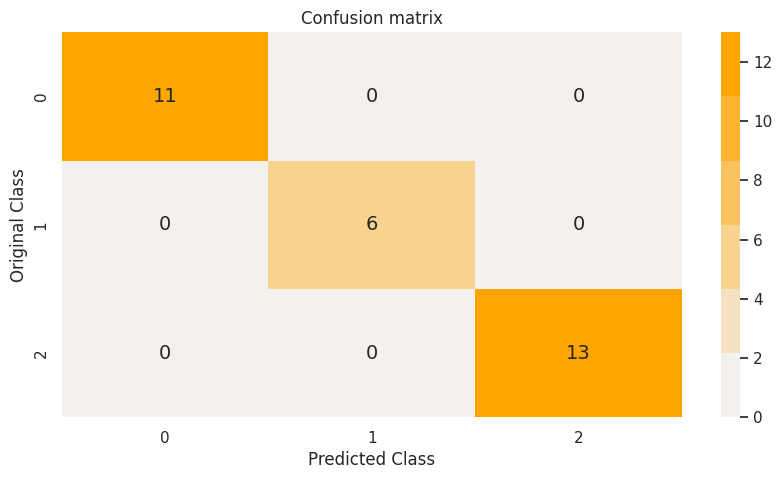

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=seed)
print("accuracy score for models with train set = 0.80 and test set = 0.20 and all the data is standardized")
model_evaluations(X_train, y_train, X_test, y_test)

Lab 5(ii)

In [11]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    sns.set(font_scale=1)
    plt.figure(figsize=(10,5))
    labels = [3,4,5,6,7,8,9]
    # representing A in heatmap format
    cmap1=sns.light_palette("orange")
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".0f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

In [12]:
df = pd.read_csv('winequalityN.csv')

In [13]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
df.isna().sum().sum()

38

In [15]:
df.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [16]:
df.shape

(6497, 13)

In [17]:
df.dropna(inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [19]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [21]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [22]:
def model_evaluations(X_train,y_train,X_test,y_test):
    gb = GaussianNB()
    knn = KNeighborsClassifier(round(math.sqrt(X_train.shape[0])))
    dt = DecisionTreeClassifier()
    gb.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    y_pred = gb.predict(X_test)
    print(f"\nmodel: Naive bayes \naccuracy:{accuracy_score(y_test,y_pred)}")
    plot_confusion_matrix(y_test,y_pred)
    y_pred = knn.predict(X_test)
    print(f"\n\nmodel: k nearest neighbors\naccuracy:{accuracy_score(y_test,y_pred)}")
    plot_confusion_matrix(y_test,y_pred)
    y_pred = dt.predict(X_test)
    print(f"\n\nmodel:decision tree \naccuracy:{accuracy_score(y_test,y_pred)}")
    plot_confusion_matrix(y_test,y_pred)

accuracy score for models with train set = 0.75 and test set = 0.25 

model: Naive bayes 
accuracy:0.40779702970297027


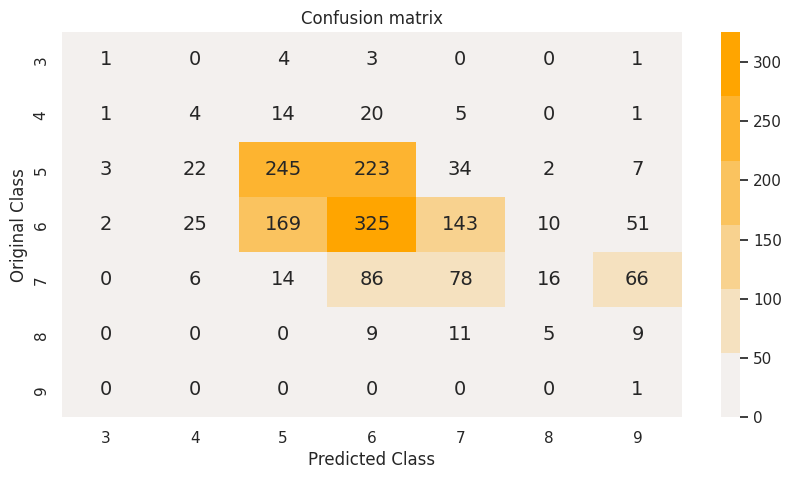



model: k nearest neighbors
accuracy:0.4560643564356436


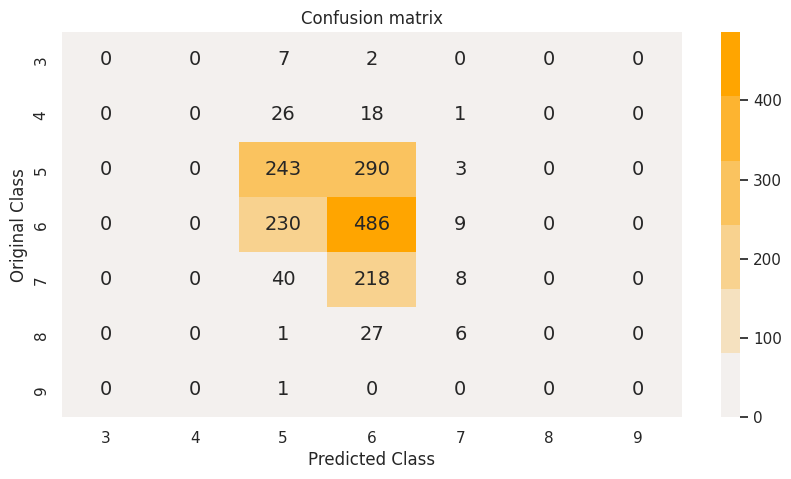



model:decision tree 
accuracy:0.5841584158415841


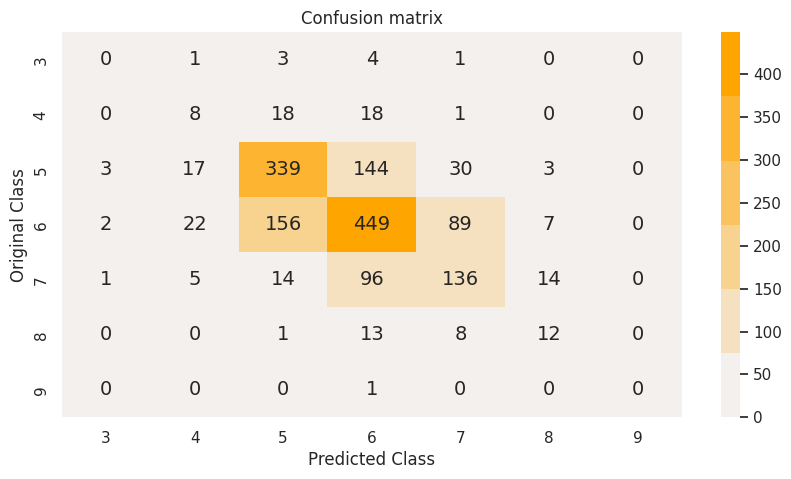

In [23]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print("accuracy score for models with train set = 0.75 and test set = 0.25 ")
model_evaluations(X_train, y_train, X_test, y_test)

accuracy score for models with train set = 0.667 and test set = 0.333 

model: Naive bayes 
accuracy:0.4324198792382722


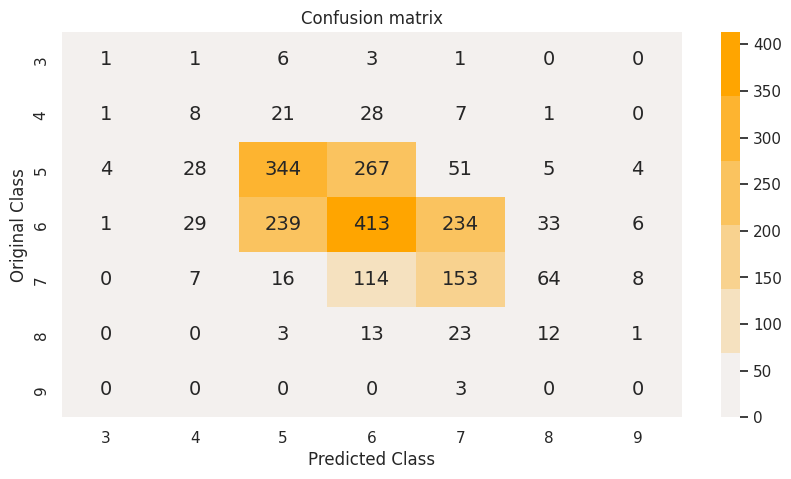



model: k nearest neighbors
accuracy:0.4528564793311658


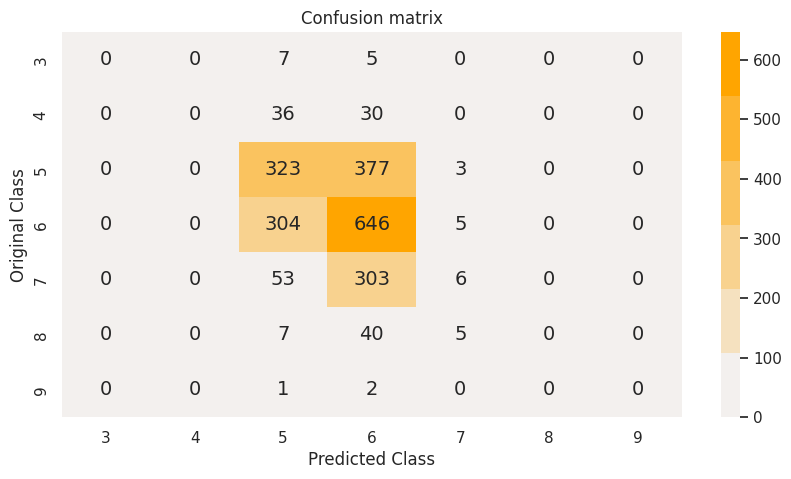



model:decision tree 
accuracy:0.5852299117510451


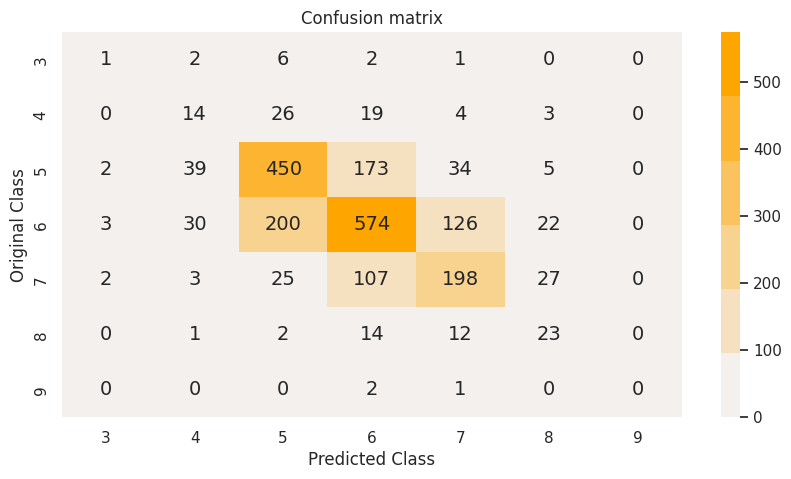

In [24]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.333,random_state=0)
print("accuracy score for models with train set = 0.667 and test set = 0.333 ")
model_evaluations(X_train, y_train, X_test, y_test)

accuracy score for models with train set = 0.75 and test set = 0.25 

model: Naive bayes 
accuracy:0.40779702970297027


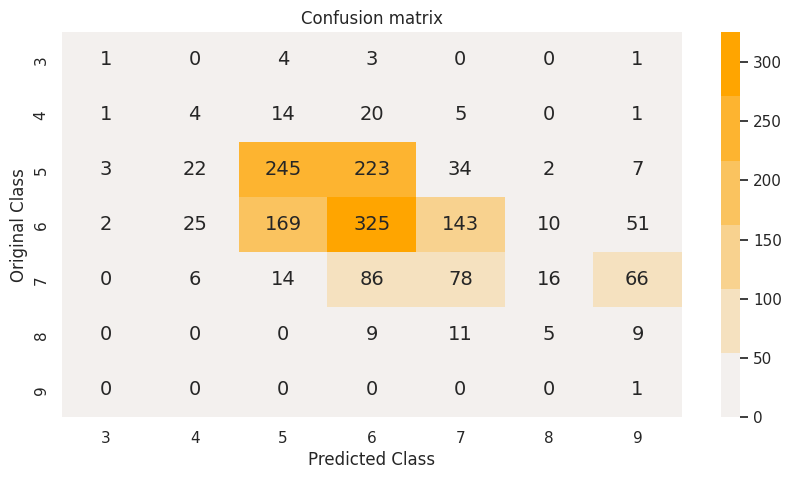



model: k nearest neighbors
accuracy:0.4560643564356436


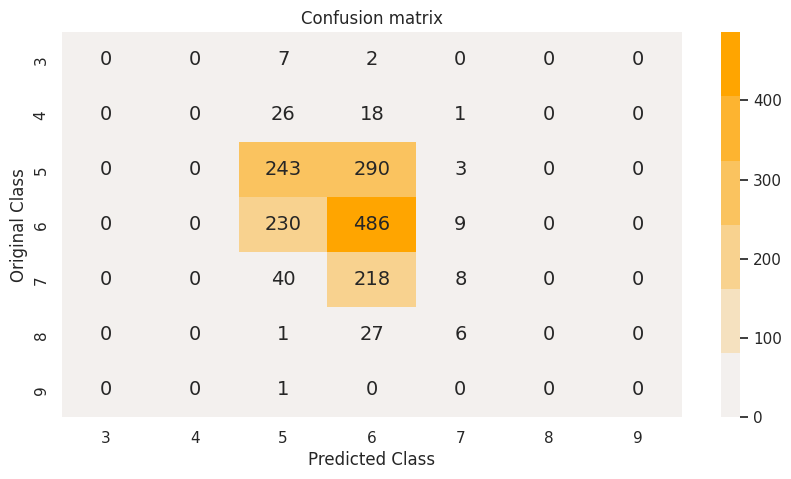



model:decision tree 
accuracy:0.5959158415841584


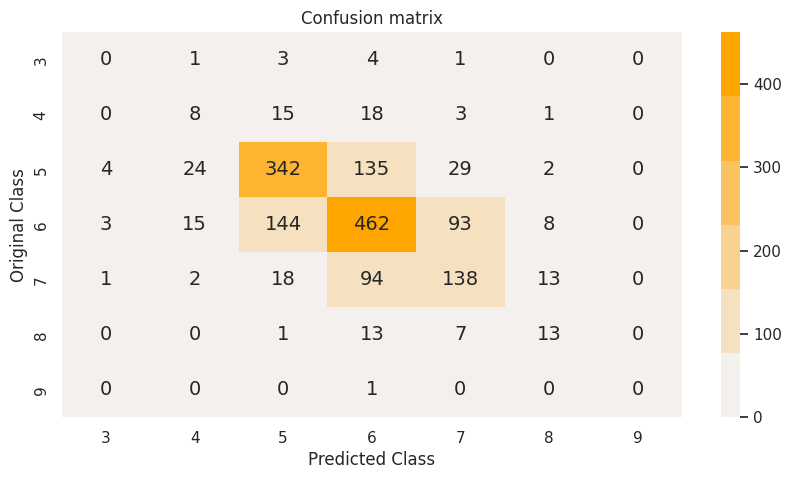

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print("accuracy score for models with train set = 0.75 and test set = 0.25 ")
model_evaluations(X_train, y_train, X_test, y_test)

accuracy score for models with train set = 0.75 and test set = 0.25 

model: Naive bayes 
accuracy:0.2109529702970297


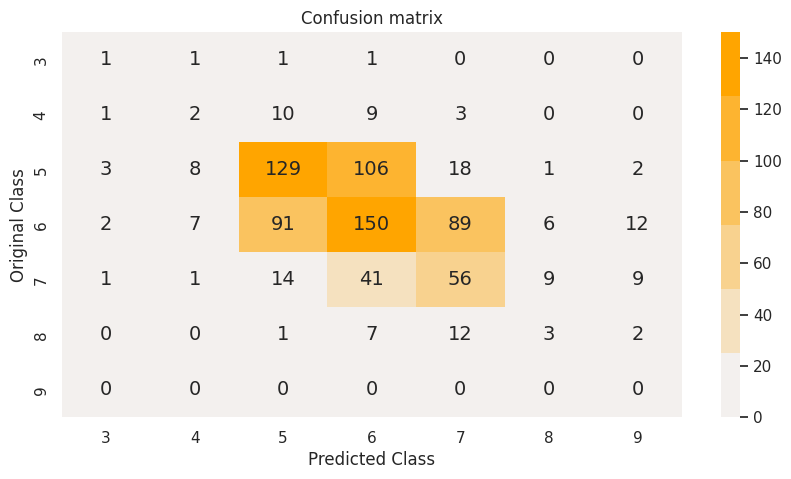



model: k nearest neighbors 
accuracy:0.22914603960396035


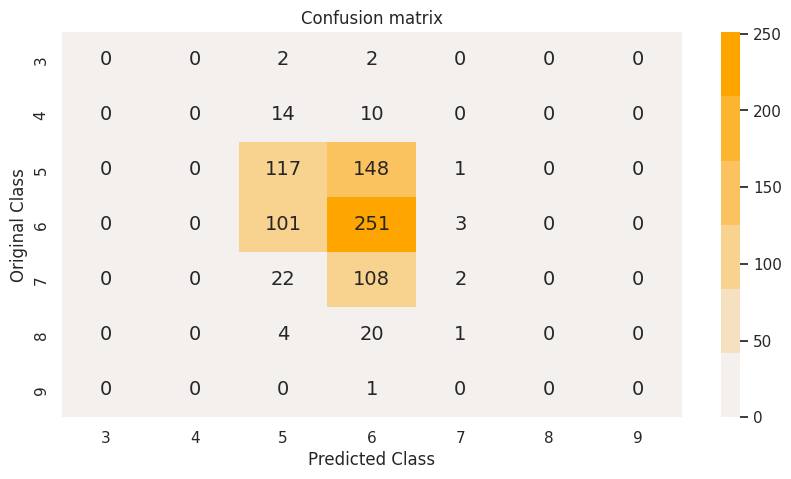



model:decision tree 
accuracy:0.29925742574257425


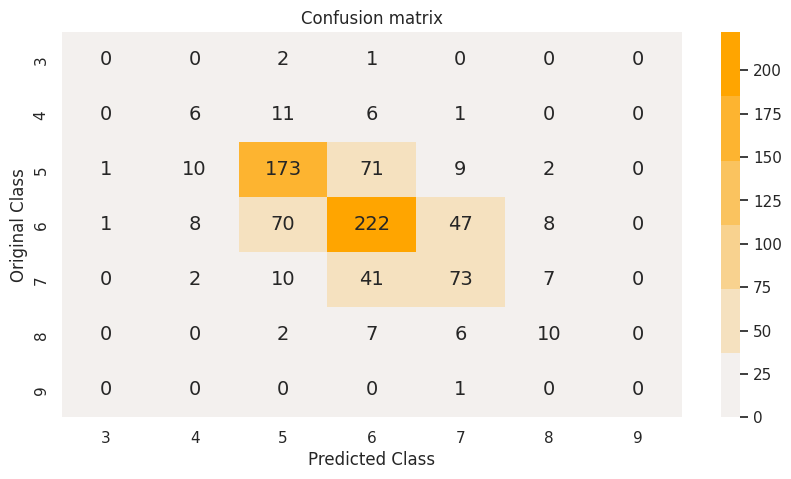

In [26]:
import random
def plot_c(C):
    sns.set(font_scale=1)
    plt.figure(figsize=(10,5))
    labels = [3,4,5,6,7,8,9]
    # representing A in heatmap format
    cmap1=sns.light_palette("orange")
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".0f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()
acc1, acc2, acc3 = list(),list(),list()
cf1, cf2, cf3 =np.zeros((7,7),dtype=np.int64).tolist(),np.zeros((7,7),dtype=np.int64).tolist(),np.zeros((7,7),dtype=np.int64).tolist()
for _ in range(5):
    rd = random.randint(0,1000)
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=rd)
    gb = GaussianNB()
    knn = KNeighborsClassifier(round(math.sqrt(X_train.shape[0])))
    dt = DecisionTreeClassifier()
    gb.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    y_pred = gb.predict(X_test)
    acc1.append(accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    cf1 =  [[cf1[k][j] + cm[k][j]  for j in range(7)] for k in range(7)]
    y_pred = knn.predict(X_test)
    acc2.append(accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    cf2 =  [[cf2[k][j] + cm[k][j]  for j in range(7)] for k in range(7)]
    y_pred = dt.predict(X_test)
    acc3.append(accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    cf3 =  [[cf3[k][j] + cm[k][j]  for j in range(7)] for k in range(7)]
print("accuracy score for models with train set = 0.75 and test set = 0.25 ")
print(f"\nmodel: Naive bayes \naccuracy:{sum(acc1)/10}")
cf1 = [[round(cf1[k][j]/10)  for j in range(7)] for k in range(7)]
plot_c(cf1)
print(f"\n\nmodel: k nearest neighbors \naccuracy:{sum(acc2)/10}")
cf2 = [[round(cf2[k][j]/10)  for j in range(7)] for k in range(7)]
plot_c(cf2)
print(f"\n\nmodel:decision tree \naccuracy:{sum(acc3)/10}")
cf3 = [[round(cf3[k][j]/10)  for j in range(7)] for k in range(7)]
plot_c(cf3)

In [27]:
from sklearn.model_selection import cross_val_score
DT = cross_val_score(DecisionTreeClassifier(), X,y )
print("DecisionTree :",DT.mean())
KNN = cross_val_score(KNeighborsClassifier(), X,y )
print("KNeighborsClassifier :",KNN.mean())
NB = cross_val_score(GaussianNB(), X,y)
print("GaussianNB : ",NB.mean())

DecisionTree : 0.39718153716487203
KNeighborsClassifier : 0.3953235928636933
GaussianNB :  0.3668472053615683


accuracy score for models with train set = 0.75 and test set = 0.25 and all the data is standardized

model: Naive bayes 
accuracy:0.40779702970297027


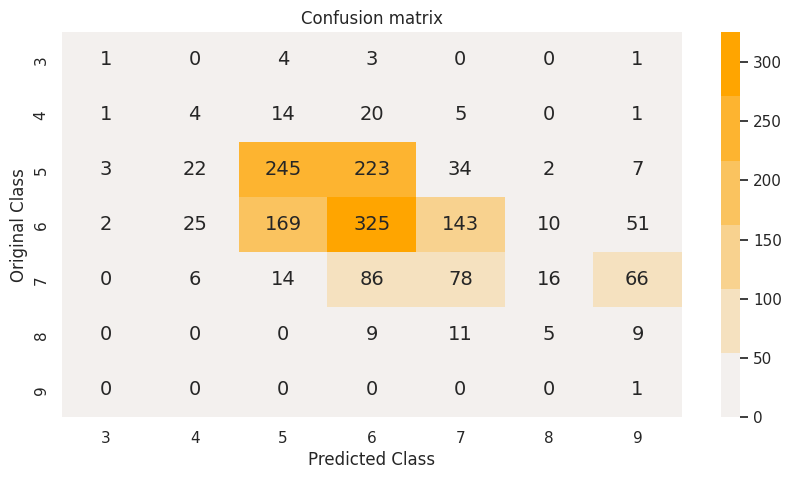



model: k nearest neighbors
accuracy:0.4560643564356436


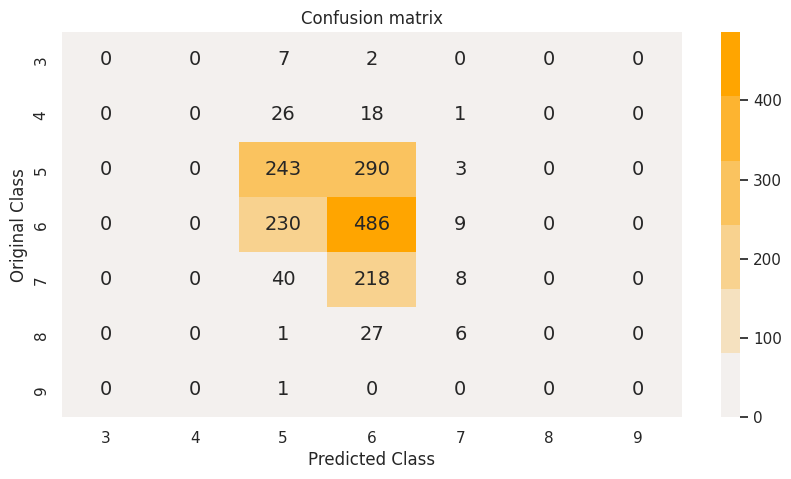



model:decision tree 
accuracy:0.6014851485148515


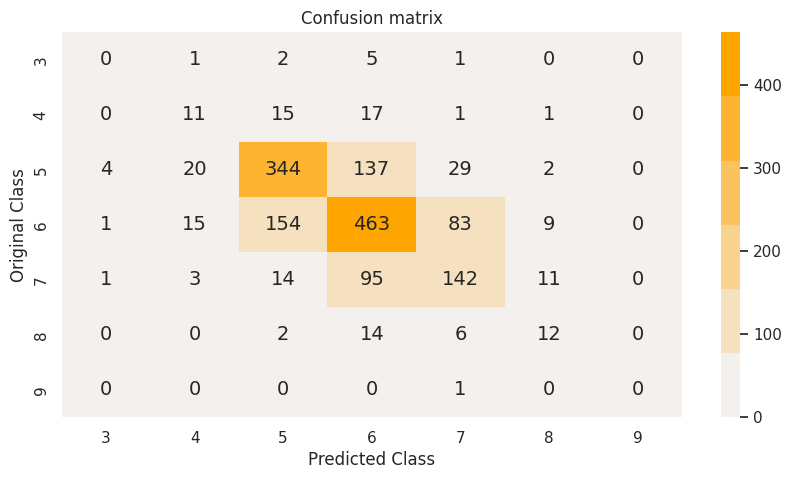

In [28]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print("accuracy score for models with train set = 0.75 and test set = 0.25 and all the data is standardized")
model_evaluations(X_train, y_train, X_test, y_test)